<a href="https://colab.research.google.com/github/preeti607/ShapeAI_PYTHON_MACHINE_LEARNING/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Loading dataset**

In [ ]:
Dataframe = pd.read_csv('/content/Final Project 2.csv')

**Exploring Dataset**

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**Data Analysis**

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation**

In [ ]:
correlation = gold_data.corr()

**Heatmap**

ValueError: ignored

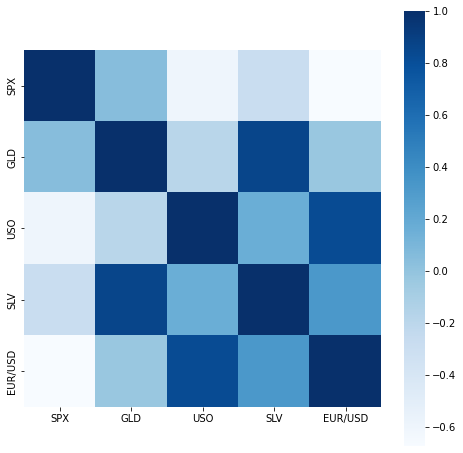

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.if', annot=True, annot_kws={'size':8}, cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


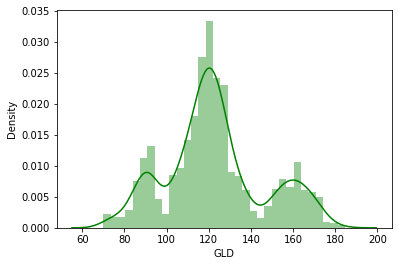

In [ ]:
sns.distplot(gold_data['GLD'],color='green')

**Preparing Dataset for Training**

In [ ]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']
print(x)

NameError: ignored

In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(y.shape,y_train.shape,y_test.shape)
                        

(2290,) (1832,) (458,)


**Model training:Random Forest Regressor**

In [ ]:
model=RandomForestRegressor(n_estimators=100)

In [ ]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
test_data_prediction=model.predict(x_test)
print(test_data_prediction)

[168.46889943  81.76950009 116.05810034 127.50270083 120.67730145
 154.91969768 150.22309872 126.02890035 117.42799873 125.86830117
 116.77130077 172.07240081 141.44119879 167.60829849 115.0924
 117.76260073 138.8205037  170.05230079 159.20470328 157.9908991
 155.22030022 125.2573002  176.29789988 156.95470399 125.23670045
  94.02570006  77.22350013 120.38639983 119.10259934 167.46439907
  88.18280069 125.21350026  91.2619008  117.66670015 121.18639891
 136.35950079 115.52400105 115.79980085 146.55310014 106.93210104
 104.25060253  87.22949801 126.55770043 117.94639988 152.59709903
 119.64080015 108.36229973 108.14379865  93.10310003 126.93889842
  75.23910051 113.65729898 121.46939995 111.24089918 118.81099895
 120.68689976 159.55710002 168.30690112 146.61659681  85.87809892
  94.15990027  86.66959867  90.51739998 119.10220073 126.39010069
 127.37990031 168.9580001  122.16749955 117.27179888  98.42140057
 167.75090127 143.21599753 131.58030267 121.07250229 120.9814995
 119.7414006  11

In [ ]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print('R squared error:=',error_score)

R squared error:= 0.9891581638629551


In [ ]:
y_test=list(y_test)


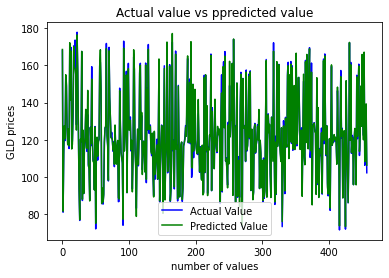

In [ ]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual value vs ppredicted value')
plt.xlabel('number of values')
plt.ylabel('GLD prices')
plt.legend()
plt.show()